# Random forests

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [4]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [6]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [7]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [8]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [9]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [10]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_ranked, y_teams_ranked, random_state=20, test_size=0.2)

In [13]:
### Wat ga ik met die test ding doen

# Model 1 -----------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [16]:
#40 sec voor individueel / 55 sec voor teams / nu 7 min met extra HP

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test, y_test)

0.7589736197203402

### F1 enzoo metrics

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.75      0.76      3486
        True       0.75      0.77      0.76      3451

    accuracy                           0.76      6937
   macro avg       0.76      0.76      0.76      6937
weighted avg       0.76      0.76      0.76      6937



In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7589736197203402
recall 0.7678933642422486
precision 0.7526270945754047
f1 0.7601835915088927


## Conf matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[2615  871]
 [ 801 2650]]


[[2615  871]
 [ 801 2650]]
0.7589736197203402


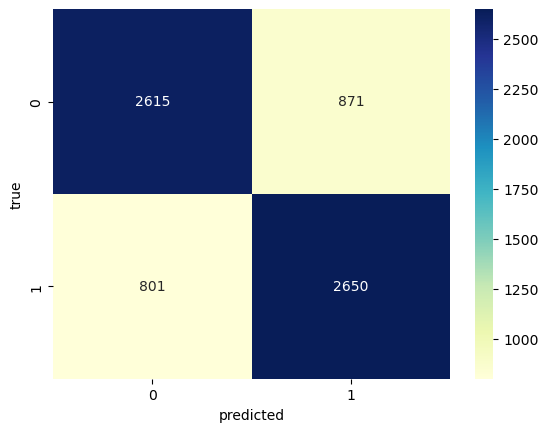

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

[0.07105264 0.80595616 0.83707026 0.27896328 0.55474352 0.96842038
 0.31204103 0.56748008 0.08154838 0.49637642 0.30509005 0.73608104
 0.61827243 0.8909597  0.73732477 0.48577922 0.49862435 0.03048425
 0.46655585 0.289486   0.33713604 0.93061906 0.51342663 0.60458972
 0.29024609 0.55426953 0.49960539 0.45932938 0.46632703 0.43321802
 0.08533834 0.52640854 0.44118476 0.26597523 0.12143645 0.41214184
 0.91938745 0.1155345  0.71823403 0.5375871  0.82227885 0.27390306
 0.72739166 0.10076635 0.27224364 0.51607156 0.47264352 0.22591641
 0.91987881 0.82869185 0.80197595 0.64119991 0.27546787 0.18315292
 0.46533407 0.93983591 0.67699234 0.68835288 0.52747538 0.47299777
 0.59506555 0.91473481 0.56167961 0.55395157 0.75331792 0.51846882
 0.4436693  0.39827057 0.85363421 0.32827595 0.89274165 0.54490519
 0.43067074 0.70836628 0.52167006 0.69549144 0.25746721 0.58501475
 0.88634356 0.64682943 0.43900266 0.27157375 0.49233819 0.24935324
 0.95628314 0.52083159 0.2027686  0.92211006 0.6080985  0.2190

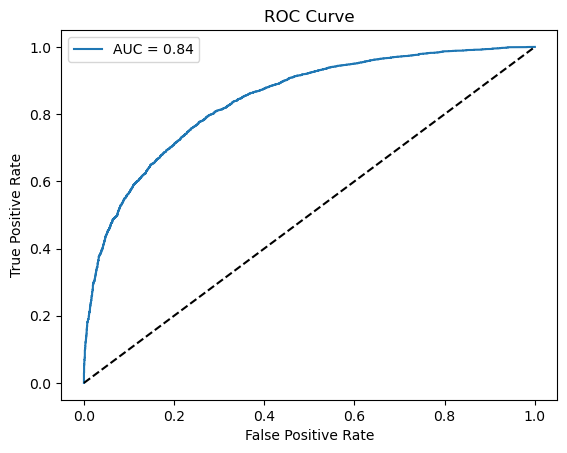

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [28]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [29]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.046393
avg_positioning_percent_behind_ball,0.042238
max_positioning_percent_behind_ball,0.026866
avg_positioning_time_front_of_ball,0.025881
min_positioning_percent_infront_ball,0.023107
...,...
avg_speed,0.002981
movement_avg_speed_percentage_1,0.002937
movement_avg_powerslide_duration_3,0.002335
movement_avg_powerslide_duration_2,0.002304


In [30]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.485684
max_positioning_percent_behind_ball,0.419508
min_positioning_percent_behind_ball,0.389609
positioning_percent_behind_ball_1,0.328927
positioning_percent_behind_ball_3,0.328921
...,...
positioning_percent_infront_ball_3,-0.328922
positioning_percent_infront_ball_1,-0.328927
max_positioning_percent_infront_ball,-0.389609
min_positioning_percent_infront_ball,-0.419508


## statistics

In [31]:
# average for winners and average for losers
X_train['avg_positioning_percent_behind_ball'].groupby(y_train).mean()

winner
False    69.800027
True     73.143630
Name: avg_positioning_percent_behind_ball, dtype: float64

In [32]:
# average for winners and average for losers
X_train['max_positioning_percent_behind_ball'].groupby(y_train).mean()

winner
False    73.714321
True     77.002326
Name: max_positioning_percent_behind_ball, dtype: float64

In [33]:
# average for winners and average for losers
X_train['avg_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.199970
True     26.856369
Name: avg_positioning_percent_infront_ball, dtype: float64

In [34]:
# average for winners and average for losers
X_train['min_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    26.285679
True     22.997672
Name: min_positioning_percent_infront_ball, dtype: float64

# Model 2 -------------------------------

## Model

In [35]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [36]:
#13 min de volgende / 8 min voor team / 4 op blauwe laptop

In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [38]:
y_pred2 = rf2.predict(X_test)

In [39]:
rf2.score(X_test, y_test)

0.7547931382441978

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.76      0.74      0.75      3486
        True       0.75      0.77      0.76      3451

    accuracy                           0.75      6937
   macro avg       0.76      0.75      0.75      6937
weighted avg       0.76      0.75      0.75      6937



In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7547931382441978
recall 0.7690524485656332
precision 0.7459246767847105
f1 0.7573120273933515


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7547931382441978


### Conf matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred2))

[[2582  904]
 [ 797 2654]]


[[2582  904]
 [ 797 2654]]
0.7547931382441978


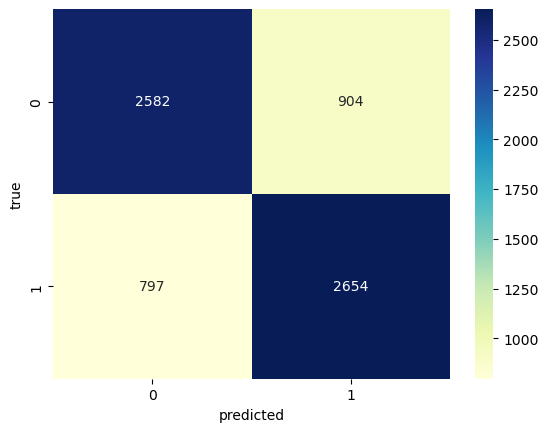

In [47]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

[0.03924938 0.79147765 0.84080328 0.24808446 0.58543974 0.95249045
 0.41406193 0.55663435 0.09694476 0.5189034  0.33624859 0.77720935
 0.5854449  0.95326373 0.74503664 0.42906175 0.49697199 0.04274247
 0.49904547 0.30491053 0.3515031  0.91499246 0.51175391 0.60585542
 0.26581766 0.53730477 0.6228106  0.47210567 0.47168788 0.41123898
 0.05383745 0.51489122 0.48710944 0.22992778 0.13252934 0.44098954
 0.9295826  0.1139193  0.74515814 0.54807781 0.76554163 0.23428509
 0.71284438 0.05369652 0.29756322 0.52005759 0.45543149 0.24924114
 0.9562072  0.86263791 0.8358401  0.6424739  0.17963877 0.2875721
 0.40671303 0.95293448 0.64943445 0.6755236  0.55954975 0.51790292
 0.5928759  0.93459808 0.5413328  0.56131958 0.73121174 0.48658594
 0.43707009 0.35537732 0.79436593 0.2695548  0.87164151 0.57213252
 0.42330513 0.73665671 0.52857371 0.70354097 0.24134056 0.62472882
 0.833023   0.64590343 0.47926461 0.27367114 0.49609338 0.21969044
 0.9392583  0.54222425 0.17345185 0.93359362 0.60759879 0.21529

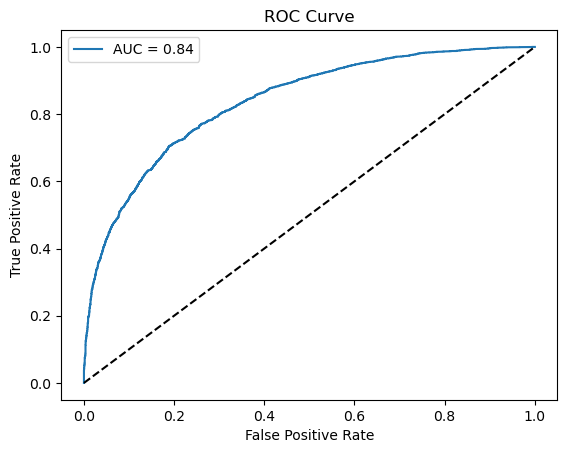

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [50]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [51]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.050607
avg_positioning_percent_infront_ball,0.048868
avg_positioning_time_front_of_ball,0.033332
max_positioning_percent_behind_ball,0.029491
min_positioning_percent_infront_ball,0.024754
...,...
movement_avg_speed_2,0.002794
movement_avg_speed_1,0.002738
movement_avg_powerslide_duration_2,0.001997
movement_avg_powerslide_duration_3,0.001957
